In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
plt.style.use(['science'])
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 250
mpl.rcParams.update({'font.size': 8})

import matplotlib.dates as mdates

myFmt = mdates.DateFormatter('%b')


cname = "viridis"

In [2]:
def read_summary(file):
    df = pd.read_csv(file)
    df["time_stamp"] = pd.to_datetime(df["time_stamp"])
    df = df.groupby("time_stamp").sum()
    df = df.rolling("7D").mean()
    return df


In [3]:
files = np.sort(glob("../data/baselines/summar*.csv"))
baselines_summaries = [read_summary(f) for f in files]

# Reinfection

In [4]:
files_reinfection = np.sort(glob("../data/reinfection/summar*.csv"))
summaries_reinfection = [read_summary(f) for f in files_reinfection]

files_prev_infected = np.sort(glob("../data/percent_previously_infected/summar*.csv"))
summaries_prev_infected = [read_summary(f) for f in files_prev_infected]


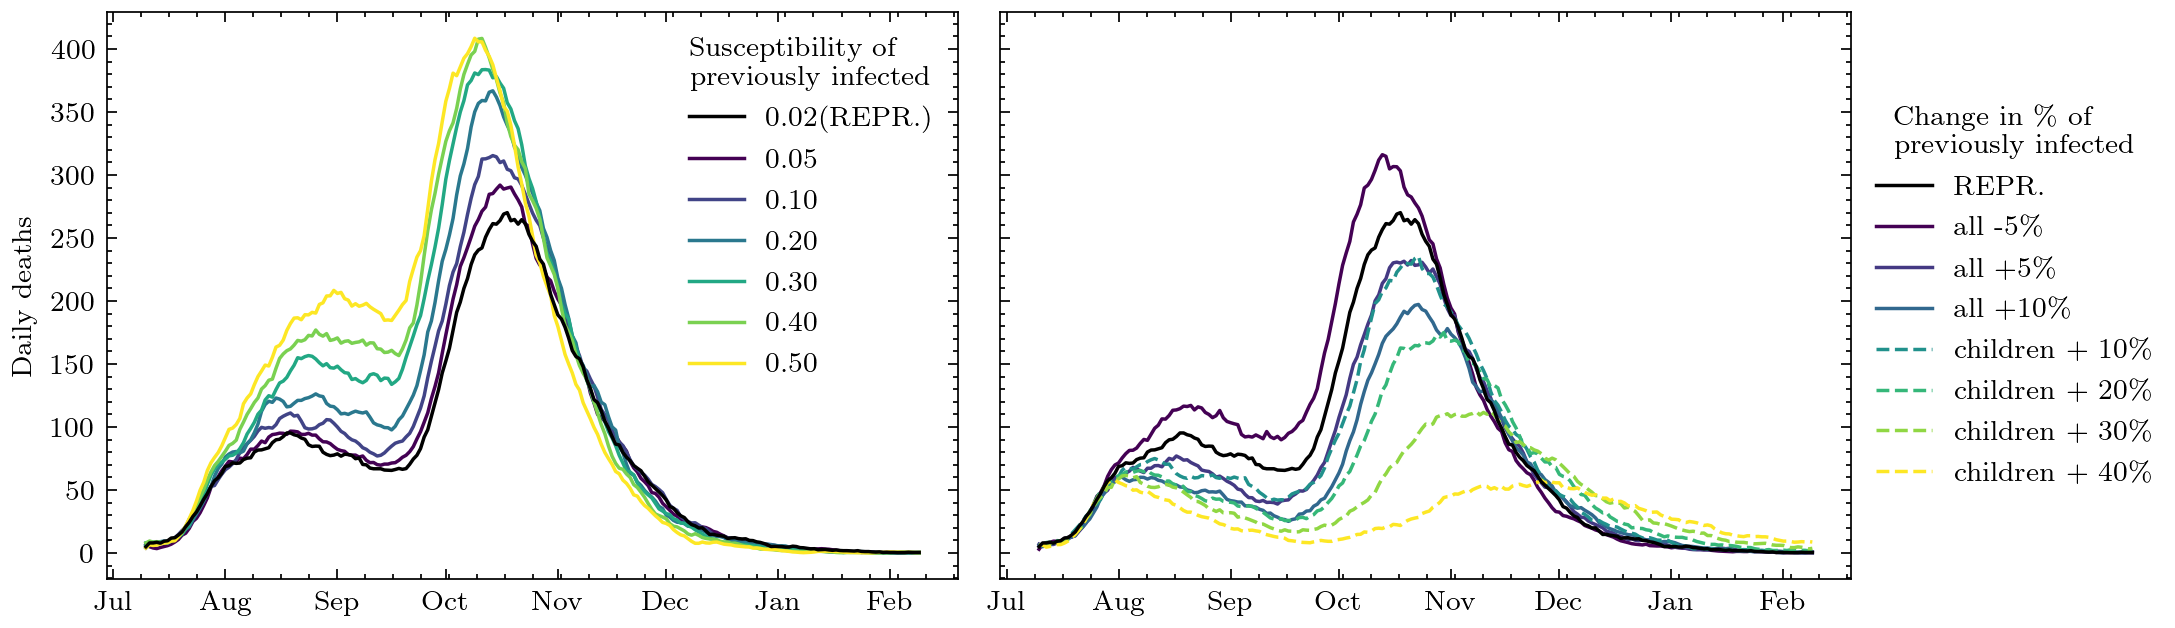

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(9,3), sharex=True, sharey=True)

ax[0].plot(baselines_summaries[7].index, baselines_summaries[7]["daily_deaths"], color = "black", label = "0.02(REPR.)", zorder=np.inf)
ax[1].plot(baselines_summaries[7].index, baselines_summaries[7]["daily_deaths"], color = "black", label = "REPR.", zorder=np.inf)

cmap = plt.get_cmap(cname)(np.linspace(0, 1, len(summaries_reinfection)))
labels = [0.95, 0.9, 0.8, 0.7, 0.6, 0.5]
for i, summary in enumerate(summaries_reinfection):
    ax[0].plot(summary.index, summary["daily_deaths"], color = cmap[i], label = f"{1 - labels[i]:.2f}")
    
cmap = plt.get_cmap(cname)(np.linspace(0, 1, len(summaries_prev_infected)))
labels = ["all -5\%", "all +5\%", "all +10\%", "children + 10\%", "children + 20\%", "children + 30\%", "children + 40\%"]
for i, summary in enumerate(summaries_prev_infected):
    if "children" in labels[i]:
        linestyle = "dashed"
    else:
        linestyle="solid"
    ax[1].plot(summary.index, summary["daily_deaths"], color = cmap[i], label = labels[i], linestyle=linestyle)
    
for i in range(2):
    ax[i].xaxis.set_major_formatter(myFmt)
    
ax[0].legend(title="Susceptibility of \npreviously infected",  labelspacing=0.5)
ax[1].legend(title="Change in \% of \npreviously infected", loc= "center left", bbox_to_anchor=(1, 0.5))

ax[0].set_ylabel("Daily deaths")
#ax[1].set_ylabel("Daily deaths")

plt.subplots_adjust(wspace=0.05, hspace=0.05)

fig.savefig("../figures/FigS2_previous_infections.pdf")